# DC Real Estate Predictor

## Predict the recommended list price for a building given a number attributes including number of rooms, bedrooms, bathrooms, and building type if applicable.

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
# Import DC Residentail ONLY for now
from pandas.io.json import json_normalize

dc_res_url = 'https://opendata.arcgis.com/datasets/c5fb3fbe4c694a59a6eef7bf5f8bc49a_25.geojson'
    
json = requests.get(dc_res_url).json()

results = json['features']


In [3]:
# Karl Lorey - create temporary dataframe and keep only required columns/ rename them to keep clean.
class DataFrameFromDict(object):
    """
    Temporarily imports data frame columns and deletes them afterwards.
    """

    def __init__(self, data):
        self.df = pd.json_normalize(data)
        self.columns = list(self.df.columns.values)

    def __enter__(self):
        return self.df

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.df.drop([c for c in self.columns], axis=1, inplace=True)
        
        
with DataFrameFromDict(results) as residential:
    
    residential['bathrooms'] = residential['properties.BATHRM']
    residential['heat_d'] = residential['properties.HEAT_D']
    residential['heat_code'] = residential['properties.HEAT']
    residential['ac'] = residential['properties.AC']
    residential['total_rooms'] = residential['properties.ROOMS']
    residential['bedrooms'] = residential['properties.BEDRM']
    residential['most_recent_build'] = residential['properties.EYB']
    residential['remodel_yr'] = residential['properties.YR_RMDL']
    residential['stories'] = residential['properties.STORIES']
    residential['sale_date'] = residential['properties.SALEDATE']
    residential['price'] = residential['properties.PRICE']
    residential['structure_d'] = residential['properties.STRUCT_D']
    residential['structure'] = residential['properties.STRUCT']
    residential['kitchens'] = residential['properties.KITCHENS']
    residential['fireplaces'] = residential['properties.FIREPLACES']
    residential['land_area'] = residential['properties.LANDAREA']

residential.head()

,bathrooms,heat_d,heat_code,ac,total_rooms,bedrooms,most_recent_build,remodel_yr,stories,sale_date,price,structure_d,structure,kitchens,fireplaces,land_area
0,3.0,Warm Cool,7.0,Y,10.0,3.0,2010,2018.0,3.0,2018/02/07 00:00:00+00,308000.0,Town Inside,5.0,1.0,0.0,640
1,3.0,Warm Cool,7.0,Y,10.0,3.0,2010,2019.0,3.0,2017/10/10 00:00:00+00,280000.0,Town Inside,5.0,1.0,0.0,640
2,3.0,Warm Cool,7.0,Y,10.0,3.0,2010,NaN,3.0,2015/07/22 00:00:00+00,237000.0,Town Inside,5.0,1.0,0.0,640
3,2.0,Warm Cool,7.0,Y,10.0,3.0,2010,NaN,3.0,2011/12/23 00:00:00+00,115000.0,Town End,4.0,1.0,0.0,640
4,2.0,Warm Cool,7.0,Y,8.0,2.0,2010,NaN,2.0,2017/05/19 00:00:00+00,329000.0,Town End,4.0,1.0,0.0,640


In [4]:
# import plotly.express as px

# fig = px.histogram(residential.price)

# fig.show()

In [5]:
# Checking null rows of data

print(residential.isnull().sum())

bathrooms             1247
heat_d                1247
heat_code             1247
ac                    1247
total_rooms           1309
bedrooms              1258
most_recent_build        0
remodel_yr           56375
stories               1296
sale_date                0
price                16705
structure_d           1247
structure             1247
kitchens              1248
fireplaces            1250
land_area                0
dtype: int64


In [6]:
# Checking how the data is missing across rows

residential[residential['ac'].isna()]

,bathrooms,heat_d,heat_code,ac,total_rooms,bedrooms,most_recent_build,remodel_yr,stories,sale_date,price,structure_d,structure,kitchens,fireplaces,land_area
4615,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,2020/02/26 00:00:00+00,1177500.0,None,NaN,NaN,NaN,21
4788,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,2020/04/27 00:00:00+00,1585000.0,None,NaN,NaN,NaN,34
4789,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,2020/03/25 00:00:00+00,1049000.0,None,NaN,NaN,NaN,34
4790,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,2020/03/30 00:00:00+00,25000.0,None,NaN,NaN,NaN,34
4915,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,1900/01/01 00:00:00+00,0.0,None,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106534,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,2020/03/11 00:00:00+00,293000.0,None,NaN,NaN,NaN,206
106535,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,1900/01/01 00:00:00+00,0.0,None,NaN,NaN,NaN,205
106536,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,1900/01/01 00:00:00+00,0.0,None,NaN,NaN,NaN,205
106537,NaN,None,NaN,None,NaN,NaN,0,NaN,NaN,2020/03/11 00:00:00+00,315000.0,None,NaN,NaN,NaN,205


### Since nulls are persistant across rows, dropping rows with mulitlpe nulls based on column with lowest amount of msising nulls

## Data Clean Up

### All Data

In [7]:
# Going to drop rows with nulls across dataset first since only about 1000 records are all missing same amount of data
residential = residential[residential['ac'].notnull()]
residential

,bathrooms,heat_d,heat_code,ac,total_rooms,bedrooms,most_recent_build,remodel_yr,stories,sale_date,price,structure_d,structure,kitchens,fireplaces,land_area
0,3.0,Warm Cool,7.0,Y,10.0,3.0,2010,2018.0,3.00,2018/02/07 00:00:00+00,308000.0,Town Inside,5.0,1.0,0.0,640
1,3.0,Warm Cool,7.0,Y,10.0,3.0,2010,2019.0,3.00,2017/10/10 00:00:00+00,280000.0,Town Inside,5.0,1.0,0.0,640
2,3.0,Warm Cool,7.0,Y,10.0,3.0,2010,NaN,3.00,2015/07/22 00:00:00+00,237000.0,Town Inside,5.0,1.0,0.0,640
3,2.0,Warm Cool,7.0,Y,10.0,3.0,2010,NaN,3.00,2011/12/23 00:00:00+00,115000.0,Town End,4.0,1.0,0.0,640
4,2.0,Warm Cool,7.0,Y,8.0,2.0,2010,NaN,2.00,2017/05/19 00:00:00+00,329000.0,Town End,4.0,1.0,0.0,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108332,1.0,Hot Water Rad,13.0,N,5.0,2.0,1956,NaN,1.00,1900/01/01 00:00:00+00,NaN,Single,1.0,1.0,0.0,3000
108333,3.0,Hot Water Rad,13.0,N,5.0,3.0,1959,1942.0,1.00,2016/02/19 00:00:00+00,0.0,Single,1.0,1.0,0.0,7829
108334,3.0,Forced Air,1.0,Y,10.0,4.0,1969,2017.0,2.25,2020/07/09 00:00:00+00,767500.0,Semi-Detached,8.0,1.0,0.0,4001
108335,1.0,Hot Water Rad,13.0,N,6.0,3.0,1956,NaN,2.00,1900/01/01 00:00:00+00,NaN,Row End,6.0,1.0,0.0,1399


In [8]:
residential.isnull().sum()

bathrooms                0
heat_d                   0
heat_code                0
ac                       0
total_rooms             62
bedrooms                11
most_recent_build        0
remodel_yr           55129
stories                 49
sale_date                0
price                16703
structure_d              0
structure                0
kitchens                 1
fireplaces               3
land_area                0
dtype: int64

### Price

### Given the large amount of $0 dollar values for sales price, and that it is our target variable, I am going to drop rows with 0 and nulls for housing price. This should still leave plenty of data (50K) to train ans test the mocel on, while also not using the imputed prices as target feature (estimate of an estimate)

In [9]:
# Dropping price values equal to zero, using inplace to do my best at limiting memory space

index_drops = residential[residential.price == 0].index

residential.drop(index_drops, inplace = True)

residential.dropna(subset = ['price'], inplace = True)

### Remodel Year

In [10]:
# Replace remodel nulls with zeros for now and convert to int

residential.remodel_yr.fillna(0, inplace = True)
residential.remodel_yr = residential.remodel_yr.round(0).astype(int)

residential.remodel_yr

0         2018
1         2019
2            0
3            0
4            0
          ... 
108328    2006
108330       0
108331       0
108334    2017
108336    2013
Name: remodel_yr, Length: 60052, dtype: int64

### Total Rooms, Bedrooms, Stories, Price, Kitchens, Fireplaces

### When comparing price to the other features, we can see fairly weak correlations between all pairs. Hopefully clustering or regression will lead to combinations that are decent predictors of residential prices in DC. It may be worth replicating a similar methodology to the commercial properties in DC to see if they are easier or harder to predict.

### Creating table with mapping for categorical codes

In [12]:
residential.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60052 entries, 0 to 108336
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          60052 non-null  float64
 1   heat_d             60052 non-null  object 
 2   heat_code          60052 non-null  float64
 3   ac                 60052 non-null  object 
 4   total_rooms        60015 non-null  float64
 5   bedrooms           60047 non-null  float64
 6   most_recent_build  60052 non-null  int64  
 7   remodel_yr         60052 non-null  int64  
 8   stories            60015 non-null  float64
 9   sale_date          60052 non-null  object 
 10  price              60052 non-null  float64
 11  structure_d        60052 non-null  object 
 12  structure          60052 non-null  float64
 13  kitchens           60051 non-null  float64
 14  fireplaces         60050 non-null  float64
 15  land_area          60052 non-null  int64  
dtypes: float64(9), int64(

In [13]:
# Groupby dataframe of categorical and categorical codes for mapping

# Heat codes
heat_codes = residential.groupby(['heat_d']).mean()

heat_codes = heat_codes['heat_code']


# AC codes, easy enough
residential['ac_code'] = np.where(residential.ac == 'Y', 1, 0)

# Structure codes
# Using pandas categorical dtype for structure codes

residential['structure_d'] = residential.structure_d.astype('category')

residential['structure_code'] = residential["structure_d"].cat.codes

structure_codes = residential.groupby(['structure_d']).mean()

structure_codes = structure_codes['structure_code']

structure_codes

structure_d
Default          0
Multi            1
No Data          2
Row End          3
Row Inside       4
Semi-Detached    5
Single           6
Town End         7
Town Inside      8
Name: structure_code, dtype: int8

### Feature Dataset

In [14]:
# Drop categorical
residential_num = residential.drop(['heat_d', 'ac', 'structure', 'structure_d', 'structure', 'sale_date'], axis = 1)

# Need to verify if the price listed in the data is in dollar value for that year, or is inflation adjusted. If it needs to be adjusted, will need to bounce the years off of an inflation calculator? EMail sent 07/20/20

In [15]:
residential.isnull().sum()

bathrooms             0
heat_d                0
heat_code             0
ac                    0
total_rooms          37
bedrooms              5
most_recent_build     0
remodel_yr            0
stories              37
sale_date             0
price                 0
structure_d           0
structure             0
kitchens              1
fireplaces            2
land_area             0
ac_code               0
structure_code        0
dtype: int64

### Instead of just dropping missing values in features, goign to use multiple imputation, is slight overkill given the large amount of data that would still remain, but it's fun to keep learning packages am i right?

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)

residential_num_imputed = pd.DataFrame(imputer.fit_transform(residential_num), columns = residential_num.columns)


In [17]:
residential_num_imputed.isnull().sum()

bathrooms            0
heat_code            0
total_rooms          0
bedrooms             0
most_recent_build    0
remodel_yr           0
stories              0
price                0
kitchens             0
fireplaces           0
land_area            0
ac_code              0
structure_code       0
dtype: int64

In [18]:
residential = residential_num_imputed

In [20]:
residential

,bathrooms,heat_code,total_rooms,bedrooms,most_recent_build,remodel_yr,stories,price,kitchens,fireplaces,land_area,ac_code,structure_code
0,3.0,7.0,10.0,3.0,2010.0,2018.0,3.00,308000.0,1.0,0.0,640.0,1.0,8.0
1,3.0,7.0,10.0,3.0,2010.0,2019.0,3.00,280000.0,1.0,0.0,640.0,1.0,8.0
2,3.0,7.0,10.0,3.0,2010.0,0.0,3.00,237000.0,1.0,0.0,640.0,1.0,8.0
3,2.0,7.0,10.0,3.0,2010.0,0.0,3.00,115000.0,1.0,0.0,640.0,1.0,7.0
4,2.0,7.0,8.0,2.0,2010.0,0.0,2.00,329000.0,1.0,0.0,640.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60047,1.0,13.0,6.0,3.0,1959.0,2006.0,2.00,435000.0,1.0,0.0,9142.0,0.0,6.0
60048,2.0,13.0,6.0,2.0,1959.0,0.0,2.00,269000.0,1.0,1.0,4571.0,0.0,6.0
60049,1.0,13.0,6.0,3.0,1956.0,0.0,1.50,200000.0,1.0,0.0,3000.0,0.0,6.0
60050,3.0,1.0,10.0,4.0,1969.0,2017.0,2.25,767500.0,1.0,0.0,4001.0,1.0,5.0


## NEED to ensure that replacing date with zero in remodel_yr is okay for model training? Put in ignore parameter for zeros in column??

In [22]:
# Data correlations now that data was cleaned
residential.corr()

# Graph of correlations

# import seaborn as sns
# sns.pairplot(residential)

,bathrooms,heat_code,total_rooms,bedrooms,most_recent_build,remodel_yr,stories,price,kitchens,fireplaces,land_area,ac_code,structure_code
bathrooms,1.000000,-0.103209,0.626210,0.643105,0.367507,0.187445,0.076740,0.430982,0.390093,0.355345,0.320355,0.245394,-0.025874
heat_code,-0.103209,1.000000,0.064473,0.031065,-0.298969,-0.135062,-0.001290,-0.011440,0.088142,0.055342,0.014367,-0.483966,-0.044827
total_rooms,0.626210,0.064473,1.000000,0.662687,0.136135,0.060182,0.065486,0.277253,0.510253,0.261172,0.292933,0.017267,-0.133416
bedrooms,0.643105,0.031065,0.662687,1.000000,0.167833,0.109671,0.063863,0.302473,0.355956,0.276283,0.308287,0.075155,0.003282
most_recent_build,0.367507,-0.298969,0.136135,0.167833,1.000000,-0.038199,0.082533,0.266456,-0.098209,0.175696,0.099333,0.432498,0.086938
remodel_yr,0.187445,-0.135062,0.060182,0.109671,-0.038199,1.000000,0.008378,0.161148,0.056084,0.133412,-0.005903,0.296872,0.005082
stories,0.076740,-0.001290,0.065486,0.063863,0.082533,0.008378,1.000000,0.078229,0.031952,0.069378,-0.026566,0.027981,-0.042354
price,0.430982,-0.011440,0.277253,0.302473,0.266456,0.161148,0.078229,1.000000,0.043930,0.417198,0.318180,0.180912,0.091071
kitchens,0.390093,0.088142,0.510253,0.355956,-0.098209,0.056084,0.031952,0.043930,1.000000,-0.010536,-0.037678,-0.118021,-0.478920
fireplaces,0.355345,0.055342,0.261172,0.276283,0.175696,0.133412,0.069378,0.417198,-0.010536,1.000000,0.335134,0.174311,0.244922


## I would estimate that there would be a higher positive correlation between the price of the property sold and the land area, which is relatively weak at 32%. 

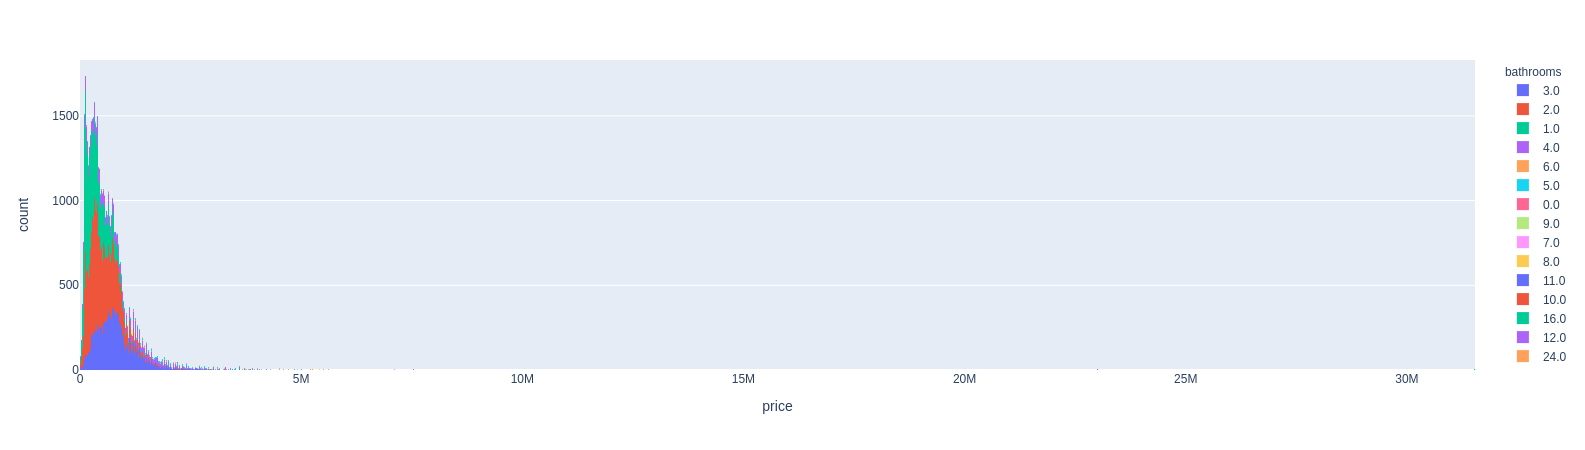

In [30]:
# Looking a tprice target variable again

import plotly.express as px

fig = px.histogram(residential, x = 'price', color = 'bathrooms')

fig.show()

## It appears that residential housing with three bedroom has a higher average sale price, versus house sales with a single bathroom, which logically makes sense. However, I want to explor this relationship closer since I expected a higher positive correlation between number of bathrooms and sale price than i am seeing. This may be due to the slae prices not being listed in present value within the data set, which I am attempting to get an answer for from DC Open Data currently.

In [32]:
residential.groupby('bathrooms').median()

,heat_code,total_rooms,bedrooms,most_recent_build,remodel_yr,stories,price,kitchens,fireplaces,land_area,ac_code,structure_code
bathrooms,,,,,,,,,,,,
0.0,0.5,0.000000,0.0,1949.0,0.0,2.0,554250.0,0.0,0.0,2230.0,0.0,4.0
1.0,7.0,6.000000,3.0,1960.0,0.0,2.0,273000.0,1.0,0.0,1900.0,1.0,4.0
2.0,7.0,7.000000,3.0,1969.0,1999.0,2.0,445000.0,1.0,0.0,2125.0,1.0,4.0
3.0,4.0,8.000000,4.0,1971.0,2006.0,2.0,745000.0,1.0,1.0,2273.0,1.0,4.0
4.0,7.0,10.000000,4.0,1971.0,2003.0,2.0,839999.0,2.0,1.0,3732.0,1.0,4.0
5.0,7.0,11.000000,5.0,1989.0,2005.0,2.5,1795000.0,1.0,2.0,6482.0,1.0,6.0
6.0,7.0,12.000000,6.0,1996.0,2003.0,2.5,2000000.0,1.0,2.0,7606.0,1.0,6.0
7.0,7.0,14.000000,7.0,2000.0,2004.0,2.5,2800000.0,1.0,3.0,9508.0,1.0,6.0
8.0,7.0,14.000000,8.0,1993.0,2007.0,2.5,2050000.0,2.0,3.0,11076.0,1.0,6.0


## Looking at median prices grouped by number of bathrooms, the relationship seems fairly positively linear. However some records that contain more than 10 bathrooms will need to be verified, and may be skewing the correlation to price, especially a property with 24 bathrooms that only has a median price of 305K when compared to the median prie of residential housing with 3 bathrooms at 745K.